In [1]:
import random
import random
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
%cd Z:\PPMI_Data\Excels\Raw_And_More
Cpg_File = pd.read_csv ("beta_post_Funnorm_PPMI_EPICn524final030618.csv")
Cpg_File.head(3)

Z:\PPMI_Data\Excels\Raw_And_More


,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,200973410167_R05C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
cg14817997,0.834027,0.849201,0.772995,0.885288,0.772547,0.756429,0.719766,0.775910,0.768914,0.759352,...,0.788239,0.838946,0.845263,0.770405,0.852917,0.783813,0.806930,0.875691,0.661276,0.737917
cg26928153,0.945589,0.948538,0.962199,0.944048,0.926306,0.956061,0.912988,0.955983,0.957120,0.897589,...,0.951206,0.958975,0.957062,0.954738,0.947765,0.958086,0.948044,0.942405,0.954990,0.946272
cg16269199,0.845186,0.911488,0.948206,0.913622,0.778551,0.903924,0.742258,0.934683,0.897787,0.741083,...,0.889774,0.899517,0.908055,0.946297,0.910522,0.895500,0.889243,0.825368,0.913328,0.898812


In [3]:
Cpg_File.index.name ='CpG'
Cpg_File.reset_index(inplace=True)
Cpg_File.head(3)

,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg14817997,0.834027,0.849201,0.772995,0.885288,0.772547,0.756429,0.719766,0.775910,0.768914,...,0.788239,0.838946,0.845263,0.770405,0.852917,0.783813,0.806930,0.875691,0.661276,0.737917
1,cg26928153,0.945589,0.948538,0.962199,0.944048,0.926306,0.956061,0.912988,0.955983,0.957120,...,0.951206,0.958975,0.957062,0.954738,0.947765,0.958086,0.948044,0.942405,0.954990,0.946272
2,cg16269199,0.845186,0.911488,0.948206,0.913622,0.778551,0.903924,0.742258,0.934683,0.897787,...,0.889774,0.899517,0.908055,0.946297,0.910522,0.895500,0.889243,0.825368,0.913328,0.898812


In [4]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Top50_eachFeats
df1 = pd.read_csv ("List_Top50FromEachFeat_Female.csv")
df3 = pd.merge (df1, Cpg_File, on= "CpG", how= "inner")
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Female\GeneCpG\Top50_eachFeats
(365, 525)


,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg00143308,0.814595,0.853361,0.852660,0.826156,0.822283,0.834423,0.779861,0.742780,0.769224,...,0.786793,0.775160,0.845692,0.778472,0.800636,0.813430,0.820073,0.812624,0.801348,0.776168
1,cg00265238,0.046933,0.040654,0.036745,0.037143,0.060072,0.025035,0.036293,0.024615,0.034346,...,0.023479,0.040003,0.052326,0.023915,0.030240,0.033055,0.028231,0.027739,0.030392,0.046289


In [5]:
dft = df3.transpose()
dft.head(2)

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
CpG,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,cg01027993,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
200973410159_R03C01,0.814595,0.046933,0.927313,0.609358,0.885663,0.90425,0.884466,0.935055,0.058645,0.858158,...,0.774812,0.07893,0.045539,0.713218,0.859955,0.621436,0.029217,0.0656,0.145068,0.045299


In [6]:
dft.rename(columns=dft.iloc[0], inplace = True)
dft.head(2)

,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,cg01027993,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
CpG,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,cg01027993,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
200973410159_R03C01,0.814595,0.046933,0.927313,0.609358,0.885663,0.90425,0.884466,0.935055,0.058645,0.858158,...,0.774812,0.07893,0.045539,0.713218,0.859955,0.621436,0.029217,0.0656,0.145068,0.045299


In [7]:
dft.index.name ='CpG'
dft.reset_index(inplace=True)
dft.head(2)

,CpG,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
0,CpG,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
1,200973410159_R03C01,0.814595,0.046933,0.927313,0.609358,0.885663,0.90425,0.884466,0.935055,0.058645,...,0.774812,0.07893,0.045539,0.713218,0.859955,0.621436,0.029217,0.0656,0.145068,0.045299


In [8]:
dft = dft.drop ([0], axis = 0)
dft.head(2)

,CpG,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
1,200973410159_R03C01,0.814595,0.046933,0.927313,0.609358,0.885663,0.90425,0.884466,0.935055,0.058645,...,0.774812,0.07893,0.045539,0.713218,0.859955,0.621436,0.029217,0.0656,0.145068,0.045299
2,200991620021_R01C01,0.853361,0.040654,0.906322,0.51338,0.877511,0.900492,0.881381,0.901233,0.059776,...,0.79612,0.04064,0.050718,0.681772,0.79281,0.598861,0.02801,0.078999,0.13374,0.056616


In [9]:
dft.rename (columns = {"CpG" : "Sentrix"}, inplace = True)
dft.head(2)

,Sentrix,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
1,200973410159_R03C01,0.814595,0.046933,0.927313,0.609358,0.885663,0.90425,0.884466,0.935055,0.058645,...,0.774812,0.07893,0.045539,0.713218,0.859955,0.621436,0.029217,0.0656,0.145068,0.045299
2,200991620021_R01C01,0.853361,0.040654,0.906322,0.51338,0.877511,0.900492,0.881381,0.901233,0.059776,...,0.79612,0.04064,0.050718,0.681772,0.79281,0.598861,0.02801,0.078999,0.13374,0.056616


In [10]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250
df2 = pd.read_csv ("Sentrix_PATNO_APPRDX_HYS_Gender_Age_of524Methyl_APP1_2.csv")
df3 = pd.merge (df2, dft, on= "Sentrix", how= "inner")
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250
(458, 372)


,Sentrix,PATNO,Gender,APPRDX,HYS,Age,AgeCate,cg00143308,cg00265238,cg00319242,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
0,200973410159_R03C01,3000,2,2,0,69.1,4,0.814595,0.046933,0.927313,...,0.774812,0.07893,0.045539,0.713218,0.859955,0.621436,0.029217,0.0656,0.145068,0.045299
1,200991620021_R01C01,3001,1,1,2,65.1,4,0.853361,0.040654,0.906322,...,0.79612,0.04064,0.050718,0.681772,0.79281,0.598861,0.02801,0.078999,0.13374,0.056616


In [11]:
female = df3[df3.Gender == 2]
print(female.shape)
female.to_csv ("Top50CpGFromEachFeat_Female.csv", index=False)

(150, 372)


# RanFor

In [12]:
female = female.drop(['PATNO', 'Sentrix', 'HYS', 'Gender','Age','AgeCate'], axis=1)
print(female.shape)
female.head(2)

(150, 366)


,APPRDX,cg00143308,cg00265238,cg00319242,cg00337440,cg00346755,cg00678862,cg00792758,cg00800908,cg00882235,...,cg27129641,cg27196273,cg27281285,cg27486833,cg27495572,cg27625479,ch.12.2471797R,ch.3.1444649R,ch.3.3596501R,ch.5.838196R
0,2,0.814595,0.046933,0.927313,0.609358,0.885663,0.90425,0.884466,0.935055,0.058645,...,0.774812,0.07893,0.045539,0.713218,0.859955,0.621436,0.029217,0.0656,0.145068,0.045299
2,1,0.85266,0.036745,0.9367,0.554657,0.897031,0.921997,0.885364,0.921612,0.070943,...,0.771254,0.071882,0.042511,0.72955,0.791456,0.647416,0.024404,0.076366,0.011557,0.039371


In [14]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = female.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7166666666666667
2
Mean accuracy: 0.7666666666666667
3
Mean accuracy: 0.7499999999999999
4
Mean accuracy: 0.8
5
Mean accuracy: 0.7
6
Mean accuracy: 0.7333333333333333
7
Mean accuracy: 0.7666666666666666
8
Mean accuracy: 0.85
9
Mean accuracy: 0.8666666666666666
10
Mean accuracy: 0.8666666666666668
11
Mean accuracy: 0.8
12
Mean accuracy: 0.7166666666666666
13
Mean accuracy: 0.7333333333333333
14
Mean accuracy: 0.7166666666666666
15
Mean accuracy: 0.75
16
Mean accuracy: 0.7333333333333333
17
Mean accuracy: 0.8166666666666668
18
Mean accuracy: 0.7666666666666667
19
Mean accuracy: 0.7833333333333334
20
Mean accuracy: 0.7666666666666667
21
Mean accuracy: 0.75
22
Mean accuracy: 0.8333333333333333
23
Mean accuracy: 0.8333333333333334
24
Mean accuracy: 0.7666666666666667
25
Mean accuracy: 0.7999999999999999
26
Mean accuracy: 0.7833333333333334
27
Mean accuracy: 0.8333333333333333
28
Mean accuracy: 0.8333333333333334
29
Mean accuracy: 0.8
30
Mean accuracy: 0.6833333333333333
3

In [15]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("Top50CpGFromEachFeat_Female_100RF.csv", index = False)

0.7791666666666663


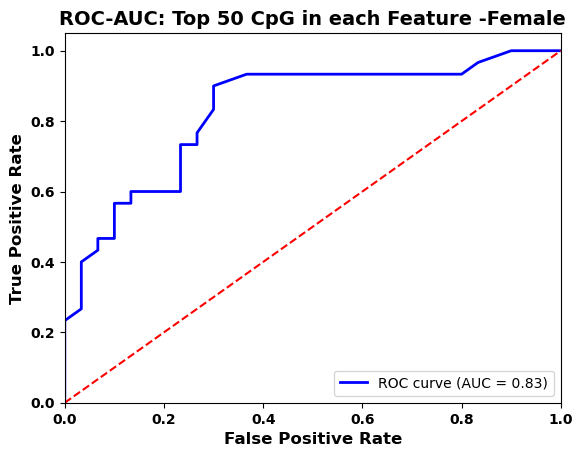

In [16]:
dataset = female.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(tpr,fpr)

# Plot the ROC curve
plt.plot(tpr,fpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Top 50 CpG in each Feature -Female', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Top50CpG_eachFeat_Female.svg')
plt.savefig('ROC_AUC_Top50CpG_eachFeat_Female.pdf')
plt.show()
